<a href="https://colab.research.google.com/github/mhmmdmin/Portfolio/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metadata

1. user_id: customer account number.
2. attrition_flag: customer status (Existing and Attrited).
3. customer_age: age of the customer.
4. gender: gender of customer (M for male and F for female).
5. dependent_count: number of dependents of customers.
6. education_level: customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown).
7. marital_status: customer's marital status (Single, Married, Divorced, and Unknown).
8. income_category: customer income interval category (Less than `$40K`, `$40K`-`$60k`, `$60K`-`$80K`, `$80K`-`$120K`, `$120K` +, and Unknown).
9. card_category: type of card used (Blue, Silver, Gold, and Platinum).
10. months_on_book: period of being a customer (in months).
11. total_relationship_count: the number of products used by customers in the bank.
12. months_inactive_12_mon: period of inactivity for the last 12 months.
13. contacts_count_12_mon: the number of interactions between the bank and the customer in the last 12 months.
14. credit_limit: credit card transaction nominal limit in one period.
15. total_revolving_bal: total funds used in one period.
16. avg_open_to_buy: the difference between the credit limit set for the cardholder's account and the current balance.
17. total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.
18. total_trans_amt: total nominal transaction in the last 12 months.
19. total_trans_ct: the number of transactions in the last 12 months.
20. total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1.
21. avg_utilization_ratio: percentage of credit card usage.


#Install and Load Library

In [ ]:
!pip install dalex
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import dalex as dx

import scikitplot as skplt

%matplotlib inline

#Load Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv")

#Data Inspection

In [ ]:
# Check first 5 data
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [ ]:
#Chek unique value in each columns
for x in df.columns:
  print(f"unique of {x} ")
  print(f"{df[x].unique()}")
  print()

unique of user_id 
[768805383 818770008 713982108 ... 716506083 717406983 714337233]

unique of attrition_flag 
['Existing Customer' 'Attrited Customer']

unique of customer_age 
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]

unique of gender 
['M' 'F']

unique of dependent_count 
[3 5 4 2 0 1]

unique of education_level 
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

unique of marital_status 
['Married' 'Single' 'Unknown' 'Divorced']

unique of income_category 
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

unique of card_category 
['Blue' 'Gold' 'Silver' 'Platinum']

unique of months_on_book 
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]

unique of total_relationship_count 
[5 6 4 3 2 1]

unique of months_inactive_12_mon 
[1 4 

I will convert data type of user_id into str so it will not include in the numeric analysis such as when we try to look after correlation matrix.

Also I will typecast a few of categorical column into numeric such as target column `attrition_flag` to make me easier during the analysis.

**Transform data type**

In [ ]:
df['attrition_flag'].replace(['Existing Customer','Attrited Customer'],[0,1],inplace=True)

In [ ]:
df['attrition_flag'].value_counts()

0    8500
1    1627
Name: attrition_flag, dtype: int64

**Check missing value**

In [ ]:
df.isna().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

There's no missing value in this data to be treated.

In [ ]:
#Check data type again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

I think the data is ready to be analyze furthermore.

# Train-Test Split Data

Split the data before EDA

In [ ]:
X = df.drop(["attrition_flag"], axis = 1)
y = df["attrition_flag"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2,
    stratify = y, 
    random_state=1000
)

# EDA

In [ ]:
#Define function for proportion
def prop_agg(df, y, x):
  temp_df = df.groupby([y,x], as_index = False).size()
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

**Checking the target distribution**

In [ ]:
X_train["attrition_flag"] = y_train

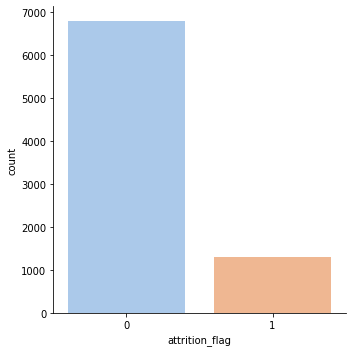

In [ ]:
#Visualization of distribution of data train
sns.catplot(x = "attrition_flag", kind = "count", data = X_train, palette="pastel");

In [ ]:
y_train.value_counts(normalize=True)

0    0.839279
1    0.160721
Name: attrition_flag, dtype: float64

In [ ]:
y_test.value_counts()

0    1701
1     325
Name: attrition_flag, dtype: int64

There's an imbalance in our dataset here where the existing customer is higher than the attrited ones. We will solve this later using Post-Modeling method where we're gonna change classification threshold to optimize metrics.

**Find out distribution between credit limit and attrition**

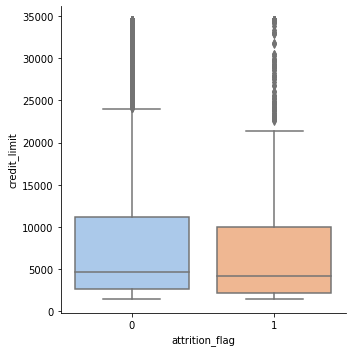

In [ ]:
# Visualization of attrition distribution by credit limit
sns.catplot(x = "attrition_flag", y = "credit_limit", data = X_train, kind='box', palette='pastel');

Because this is an online loan business, the product that it offers to its customer is a credit. Specifically speaking, the credit limit is one of the product this business offers to its customers. With this boxplot we know that there's a difference in median between they who attrit and stay to be customer.

**Checking the correlation between predictors and also target**

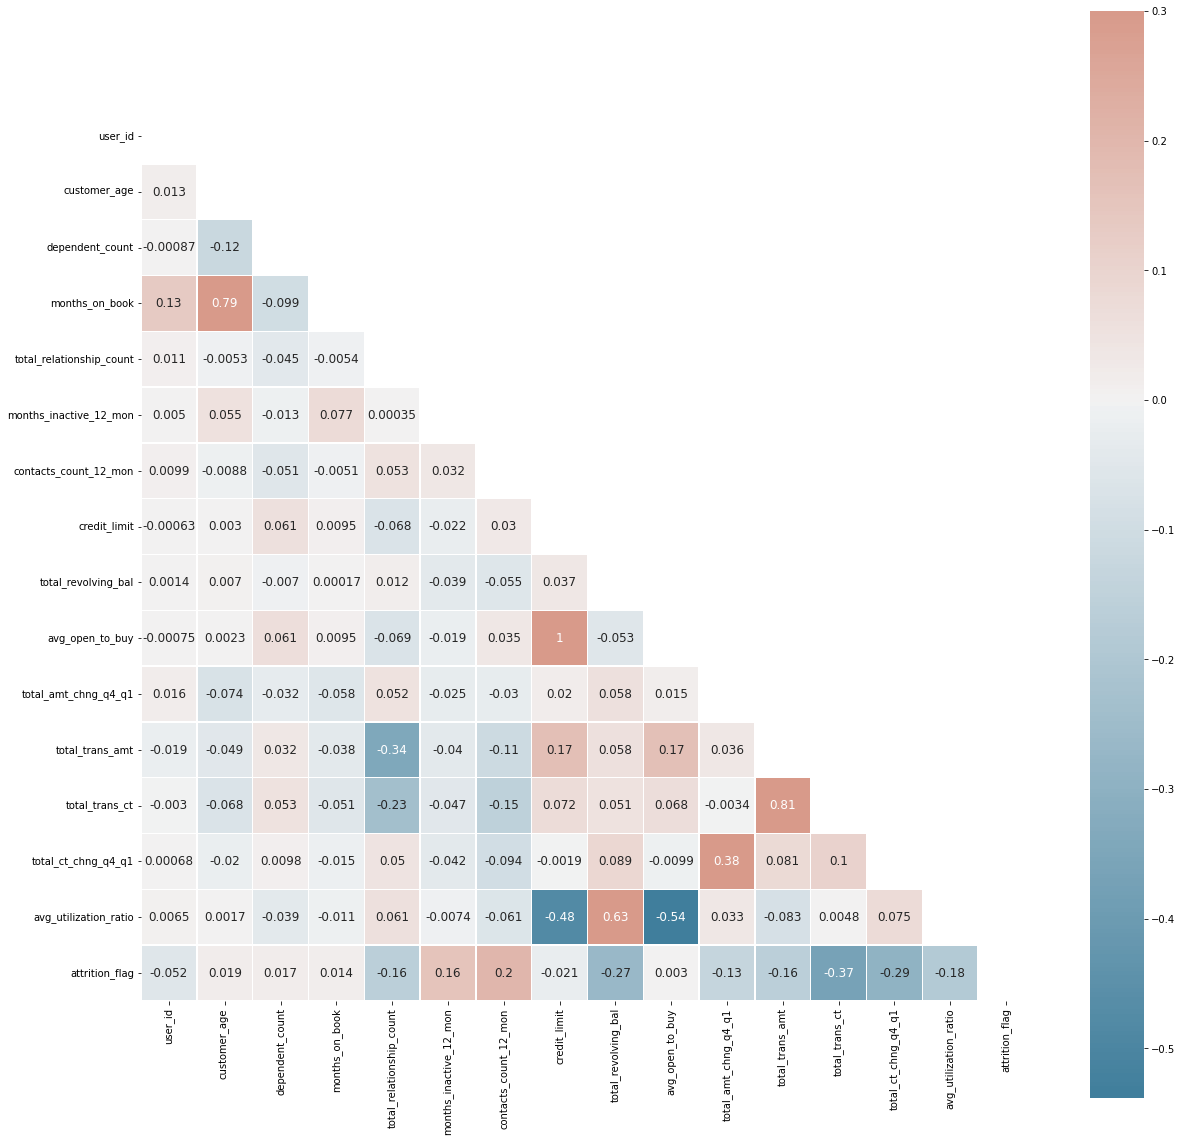

In [ ]:
# Visualization of correlation matrix 
corr = X_train.corr()
masking = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr, 
    mask=masking, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5,
    annot=True,
    annot_kws={'size':12}
);

I will only focus with the r which has strong correlation coefficient. From the matrix above I can assume there are some multicollienarities between predictors, such as `months_on_book` with `customer_age`, `avg_open_to_buy` with `credit_limit`, and `total_trans_amt` with `total_trans_ct`.

##Find out the tendency of attrition by customer age

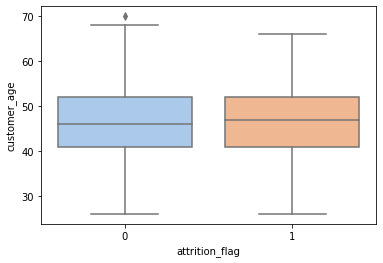

In [ ]:
#Visualization of attrition by customer age
sns.boxplot(x = "attrition_flag", 
            y = "customer_age", 
            data = X_train,
            palette='pastel');

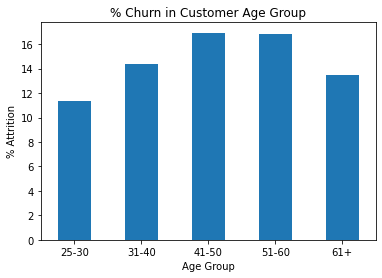

In [ ]:
X_train["customer_age_bin"] = pd.cut(X_train['customer_age'],bins=[25,30,40,50,60,73],labels=['25-30','31-40','41-50','51-60',"61+"])

(X_train.groupby("customer_age_bin")["attrition_flag"].mean()*100).plot(kind="bar").set_title("% Churn in Customer Age Group")
plt.ylabel("% Attrition")
plt.xlabel("Age Group")
plt.xticks(rotation=0);

As we can observe from the boxplot, there is a slightly difference between two groups which means there's a tendency to attrit, and the age group who tends to attrit is around 41-60 years old.

But as we can also see, the customer distribution age is around 42-52 which means it is the age of marriage and having kids.

**So, we will see the relationship between marital status, dependent count, and the attrition**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


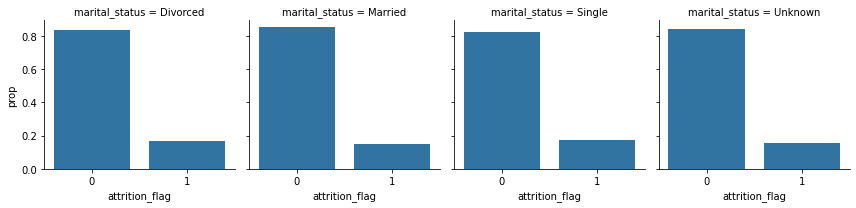

In [ ]:
# Visualization of attrition proportion by marital status
g = sns.FacetGrid(data = prop_agg(X_train, "marital_status", "attrition_flag"),col = "marital_status");
g.map(sns.barplot, "attrition_flag", "prop");

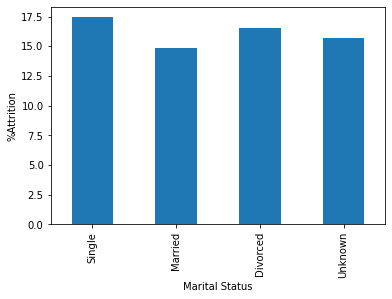

In [ ]:
# Percentage of attrition by marital status
order_mar = ['Single', 'Married', 'Divorced', 'Unknown']
(X_train.groupby('marital_status')['attrition_flag'].mean()*100).loc[order_mar].plot(kind = 'bar')
plt.ylabel('%Attrition')
plt.xlabel('Marital Status');

The married customers are less likely to attrit. It makes sense, because the customers has at least 1 dependent and maybe more. So, they will need loan if they have to. But we will check it if it's true.

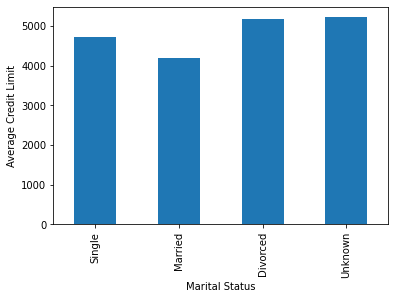

In [ ]:
# Visualization of average credit limit
X_train.groupby('marital_status')['credit_limit'].median().loc[order_mar].plot(kind = 'bar')
plt.ylabel('Average Credit Limit')
plt.xlabel('Marital Status');

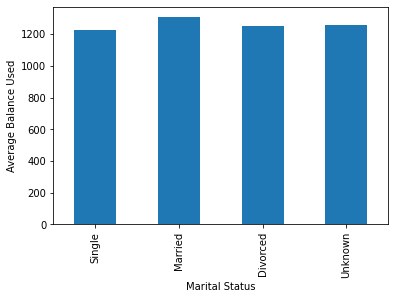

In [ ]:
# Visualization of average balance used
X_train.groupby('marital_status')['total_revolving_bal'].median().loc[order_mar].plot(kind = 'bar')
plt.ylabel('Average Balance Used')
plt.xlabel('Marital Status');

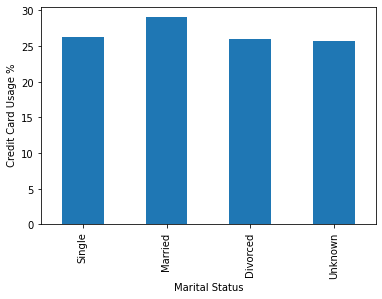

In [ ]:
# Visualization of credit card usage percentage
(X_train.groupby('marital_status')['avg_utilization_ratio'].mean()*100).loc[order_mar].plot(kind = 'bar')
plt.ylabel(' Credit Card Usage %')
plt.xlabel('Marital Status');

From visualizations above we can conclude that, Married people are rarely to churn because their needs in this product even though they tend to get lower credit limit.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


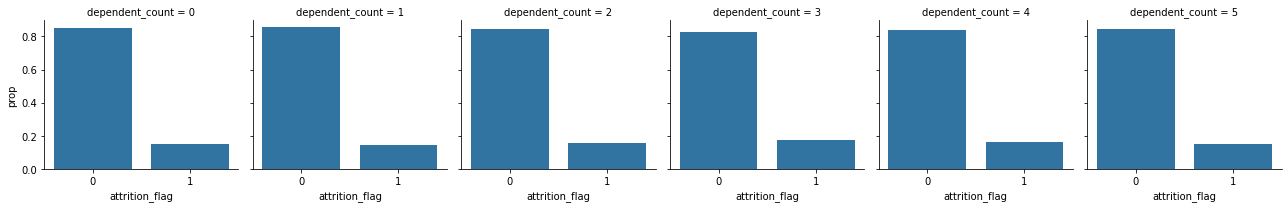

In [ ]:
# Visualization of proportion attrition by dependent count
g = sns.FacetGrid(
    data = prop_agg(X_train, "dependent_count", "attrition_flag"),
    col = "dependent_count"
)
g.map(sns.barplot, "attrition_flag", "prop");

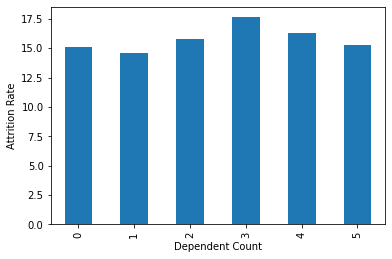

In [ ]:
# Percentage of attrition by dependent count
(X_train.groupby('dependent_count')['attrition_flag'].mean()*100).plot(kind = 'bar')
plt.ylabel('Attrition Rate')
plt.xlabel('Dependent Count');

I thought they would be a trend when the dependent count raises, the attrition will decrease. But the fact the attrition seems raises when the dependent is 3 and then decrease. We will check the relationship between dependent count and credit limit, balance used, and credit card usage ratio.

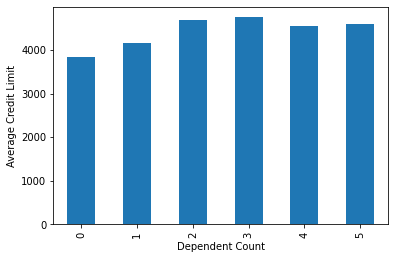

In [ ]:
# Visualizaation of average credit limit
X_train.groupby('dependent_count')['credit_limit'].median().plot(kind = 'bar')
plt.ylabel('Average Credit Limit')
plt.xlabel('Dependent Count');

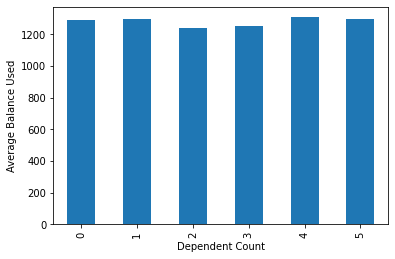

In [ ]:
# Visualization of average balance used
X_train.groupby('dependent_count')['total_revolving_bal'].median().plot(kind = 'bar')
plt.ylabel('Average Balance Used')
plt.xlabel('Dependent Count');

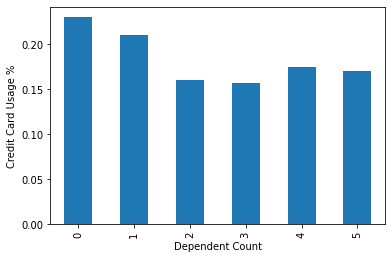

In [ ]:
# Visualization of credit card usage percentage
X_train.groupby('dependent_count')['avg_utilization_ratio'].median().plot(kind = 'bar')
plt.ylabel('Credit Card Usage %')
plt.xlabel('Dependent Count');

Customers with dependents 3 people tend to get higher credit limit, yet they don't use their credit card much.

It will make sense if they who attrit because of 3 dependents are single.

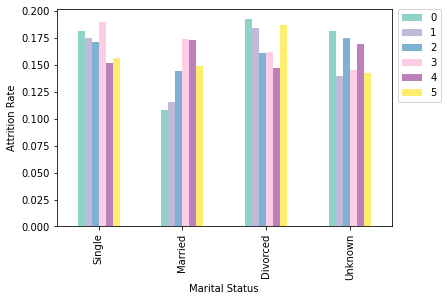

In [ ]:
pd.pivot_table(X_train, index='marital_status', columns='dependent_count', values='attrition_flag', aggfunc='mean').loc[order_mar].fillna(0).plot(kind='bar', colormap='Set3')
plt.ylabel('Attrition Rate')
plt.xlabel('Marital Status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

As we can see above they who are single and have 3 dependents are almost 20% attrit. Maybe the business can give them lower interest to decrease churn rate.

## Find out the correlation between education level and income category with attrition

In [ ]:
# Visualization of education level vs income category
order_el = ['Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate', 'Unknown']
(pd.crosstab(X_train.education_level, X_train.income_category, normalize='columns').round(4)*100).loc[order_el]

income_category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
education_level,,,,,,
Uneducated,16.49,13.94,13.74,14.27,14.51,17.33
High School,19.93,19.96,22.39,20.56,19.21,18.80
Graduate,27.84,30.60,30.42,30.40,31.93,29.45
College,9.28,10.43,9.19,11.29,9.55,9.85
Post-Graduate,3.78,6.37,5.35,5.08,4.92,4.42
Doctorate,5.50,4.13,4.28,3.71,4.25,6.34
Unknown,17.18,14.57,14.63,14.68,15.63,13.82


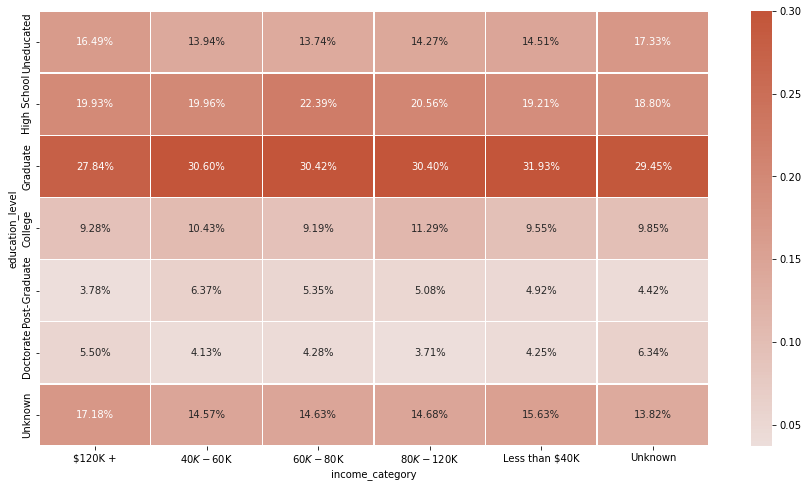

In [ ]:
cross = pd.crosstab(X_train.education_level, X_train.income_category, normalize='columns').loc[order_el]
plt.figure(figsize = (15,8))
sns.heatmap(
    cross, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=False, 
    linewidths=.5,
    annot=True,
    annot_kws={'size':10},
    fmt='.2%');

We will ignore the cross of education level's unknown and income category's unknown, because we can't find the insightful information for the business.

As we can see, 27% of customer who earn 120k+ are graduate, and only 5.5% are doctorate.

**From the table above we can assume that there's no correlation between education level and income category.**

I think if there was an additional variable of occupation or about customer job, it would make more sense that income category would have correlation with that occupation variable. Also maybe we can predict the income category using customer job and education level.

**We will see the correlation between education level with attrition**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


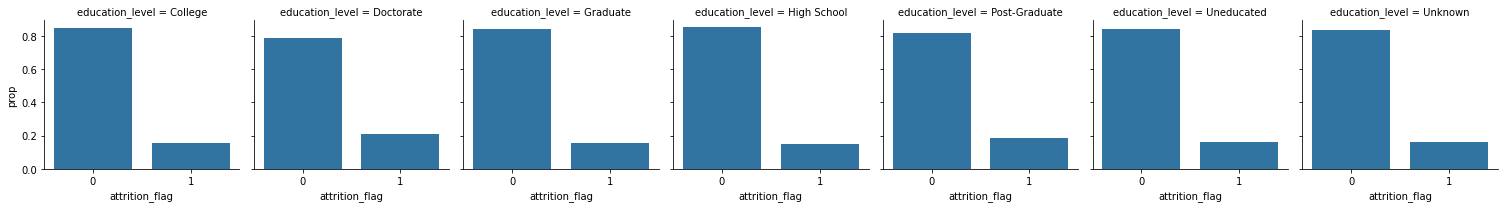

In [ ]:
# Visualization of proportion attrition by education level
g = sns.FacetGrid(
    data = prop_agg(X_train, "education_level", "attrition_flag"),
    col = "education_level"
)
g.map(sns.barplot, "attrition_flag", "prop");

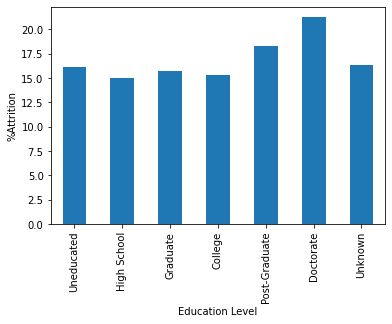

In [ ]:
# Percentage of attrition by education level count
(X_train.groupby('education_level')['attrition_flag'].mean()*100).loc[order_el].plot(kind = 'bar')
plt.ylabel('%Attrition')
plt.xlabel('Education Level');

It seems that they who take doctorate or post-graduate degree are likely to attrit. The question rises, why?

So I'll try to analyze furthermore about the correlation between credit limit and attrition.


**Next, we will see the relationship between credit limit, education level, and attrition flag.**

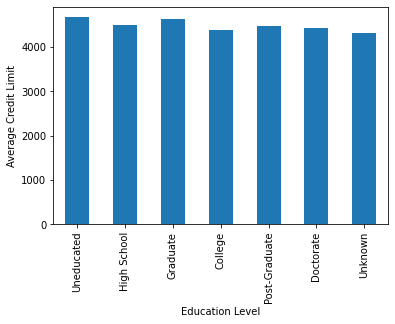

In [ ]:
X_train.groupby('education_level')['credit_limit'].median().loc[order_el].plot(kind = 'bar')
plt.ylabel('Average Credit Limit')
plt.xlabel('Education Level');

From the bar plot above we know that average of credit limit which Doctorate gets is lower than Graduate and High School even Uneducated.

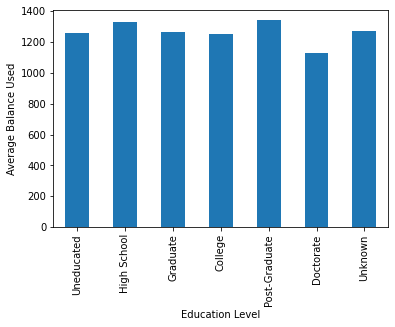

In [ ]:
X_train.groupby('education_level')['total_revolving_bal'].median().loc[order_el].plot(kind = 'bar')
plt.ylabel('Average Balance Used')
plt.xlabel('Education Level');

We also know that average balance that Doctorate used is the lowest of them all. It seems that they don't transact much.

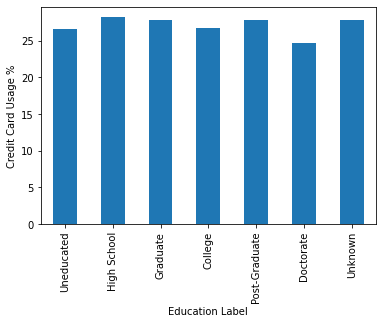

In [ ]:
(X_train.groupby('education_level')['avg_utilization_ratio'].mean()*100).loc[order_el].plot(kind = 'bar')
plt.ylabel('Credit Card Usage %')
plt.xlabel('Education Label');

Credit card usage percentage of Doctorate also the lowest of them all.

It means that Doctorate rarely used their credit card than the others. Which may be caused by lower credit limit they get.

But we will check if they who attrit, get lower credit limit due to their earning or something else.

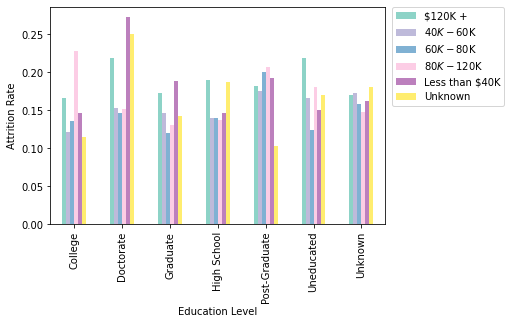

In [ ]:
pd.pivot_table(X_train, index='education_level', columns='income_category', values='attrition_flag', aggfunc='mean').fillna(0).plot(kind='bar', colormap='Set3')
plt.ylabel('Attrition Rate')
plt.xlabel('Education Level')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

We can see the doctorate who attrit and make less than 40k is the highest from doctorate population. I think it makes sense, the business only care with how much ones earn rather than their education to set their credit limit.

**Find out the correlation between income category and attrition**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


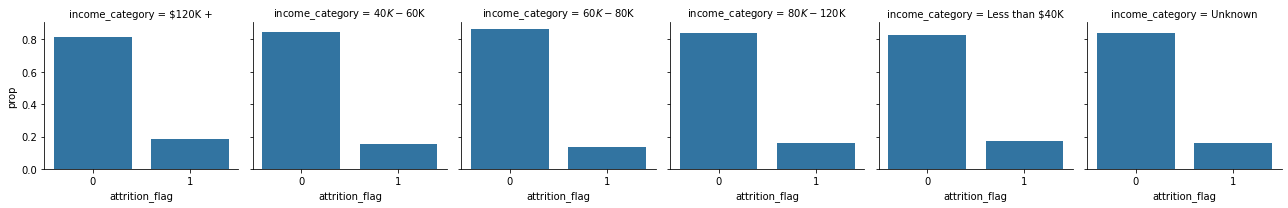

In [ ]:
# Visualization of proportion attrition by income category
g = sns.FacetGrid(
    data = prop_agg(X_train, "income_category", "attrition_flag"),
    col = "income_category"
)
g.map(sns.barplot, "attrition_flag", "prop");

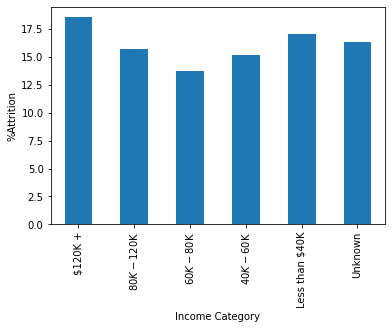

In [ ]:
# Visualization of attrition percentage by income category
order_inc = ['$120K +','$80K - $120K','$60K - $80K','$40K - $60K', 'Less than $40K', 'Unknown']
(X_train.groupby('income_category')['attrition_flag'].mean()*100).loc[order_inc].plot(kind = 'bar')
plt.ylabel('%Attrition')
plt.xlabel('Income Category');

It seems that they who earn 120k+ and less than 40k per year are likely to attrit. While they who earn 60k-80k are rarely to attrit. They who earn more than 120k a year is precious for the business. So, let's find the "WHY?".


**We will also see the relationship between credit limit, income category and attrition flag.**

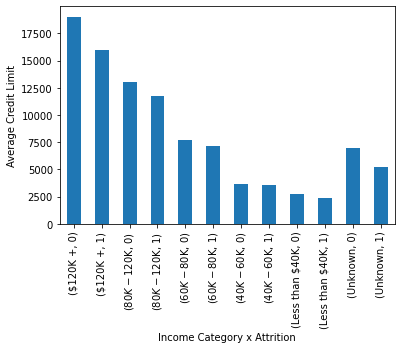

In [ ]:
X_train.groupby(['income_category','attrition_flag'])['credit_limit'].median().loc[order_inc].plot(kind = 'bar')
plt.ylabel('Average Credit Limit')
plt.xlabel('Income Category x Attrition');

They who attrit from all over income category has the same trend which is they get lower credit limit. Especially for they who earn 120k a year, the difference is significant enough. 

Text(0.5, 0, 'Income Category x Attrition')

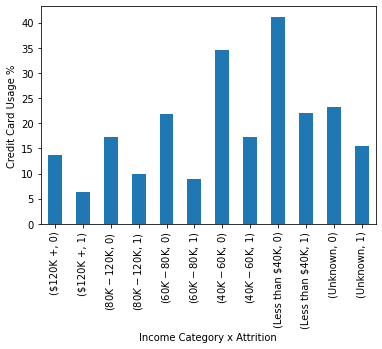

In [ ]:
(X_train.groupby(['income_category','attrition_flag'])['avg_utilization_ratio'].mean()*100).loc[order_inc].plot(kind = 'bar')
plt.ylabel('Credit Card Usage %')
plt.xlabel('Income Category x Attrition')

We find that they who attrit and make more than 120k a year are lessly to do transaction with our credit card. They also have smaller credit limit than the existing customer.

##Find out the tendency of attrition by gender

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


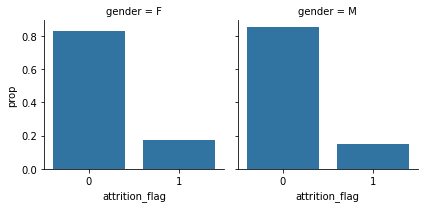

In [ ]:
# Visualization of proportion attrition by gender
g = sns.FacetGrid(
    data = prop_agg(X_train, "gender", "attrition_flag"),
    col = "gender"
)
g.map(sns.barplot, "attrition_flag", "prop");

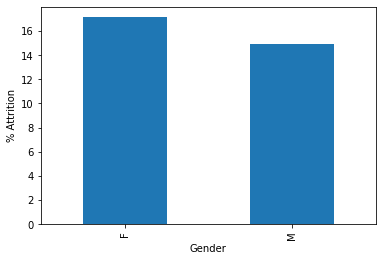

In [ ]:
# Visualization of attrition percentage by gender
(X_train.groupby('gender')['attrition_flag'].mean()*100).sort_values(axis = 0, ascending = False).plot(kind = 'bar')
plt.ylabel('% Attrition')
plt.xlabel('Gender');

As we can see above, that gender between male and female seems the same. But if we look closer, female tends to attrit more than male.

We will see the relationship of gender with credit limit.

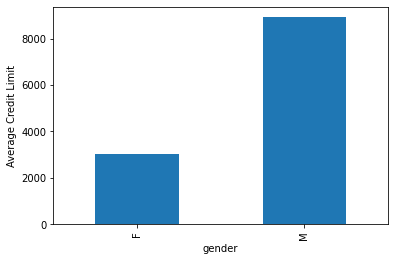

In [ ]:
X_train.groupby('gender')['credit_limit'].median().plot(kind = 'bar')
plt.ylabel('Average Credit Limit');

As we can see, that female tends to get lower credit limit than male. Maybe it is one factor why female tends to attrit.

But we will find out first how much female earns in a year.

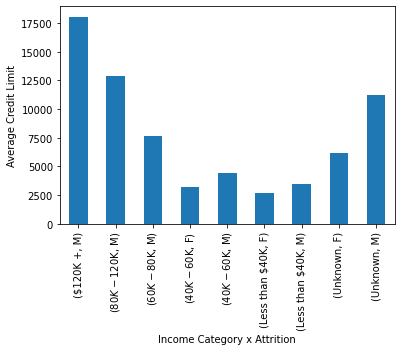

In [ ]:
X_train.groupby(['income_category','gender'])['credit_limit'].median().loc[order_inc].plot(kind = 'bar')
plt.ylabel('Average Credit Limit')
plt.xlabel('Income Category x Attrition');

From the catplot above we can assume that, there's no female who earn more than 60k+ in a year. That's why female tends to get less credit limit than male.

But we won't take this because gender is one of protected features that need to be removed from dataset

**So, rather than we use gender for our features, we can analyze other features such as card category**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


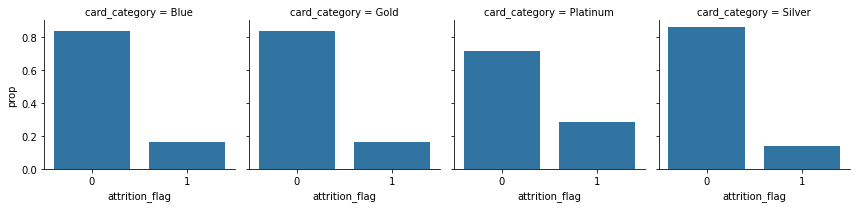

In [ ]:
# Visualization of proportion attrition by card category
g = sns.FacetGrid(
    data = prop_agg(X_train, "card_category", "attrition_flag"),
    col = "card_category"
)
g.map(sns.barplot, "attrition_flag", "prop");

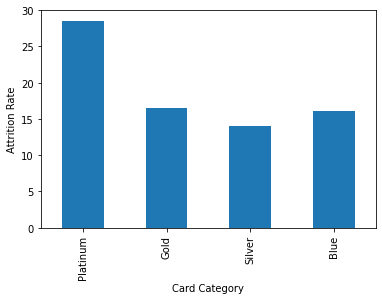

In [ ]:
# Visualization of attrition percentage by card category
order_card = ['Platinum', 'Gold', 'Silver', 'Blue']
(X_train.groupby('card_category')['attrition_flag'].mean()*100).loc[order_card].plot(kind = 'bar')
plt.ylabel('Attrition Rate')
plt.xlabel('Card Category');

It is interesting where the Platinum card holder is more likely to attrit. Maybe it's because the Platinum card holder's expectation is not met.

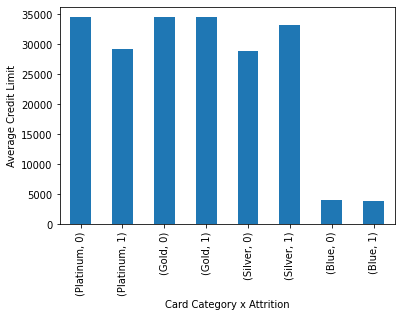

In [ ]:
X_train.groupby(['card_category','attrition_flag'])['credit_limit'].median().loc[order_card].plot(kind = 'bar')
plt.ylabel('Average Credit Limit')
plt.xlabel('Card Category x Attrition');

Yepp!! It's true, that the Platinum card holder who attrit tends to get lower credit limit than the gold one. But, we will see the percentage of credit card usage by those people.

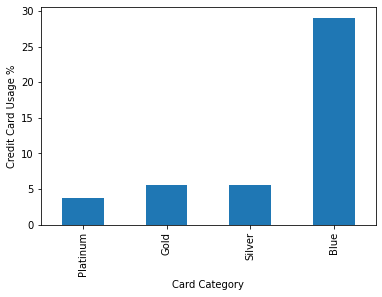

In [ ]:
(X_train.groupby('card_category')['avg_utilization_ratio'].mean()*100).loc[order_card].plot(kind = 'bar')
plt.ylabel('Credit Card Usage %')
plt.xlabel('Card Category');

It seems the trend is still the same where lower credit card usage tends to attrit or churn. Even for platinum card holder has a low credit card usage percentage rather than the blue ones.

**Find out the relationship of total product used by customer with attrition**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


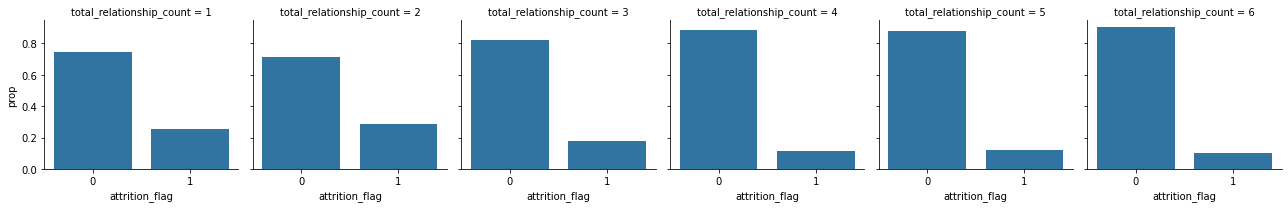

In [ ]:
# Visualization of proportion attrition by total relationship count
g = sns.FacetGrid(
    data = prop_agg(X_train, "total_relationship_count", "attrition_flag"),
    col = "total_relationship_count"
)
g.map(sns.barplot, "attrition_flag", "prop");

''

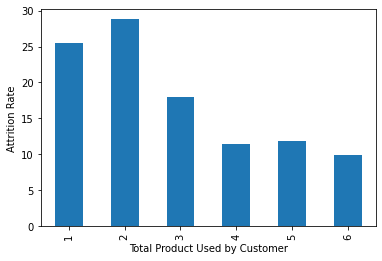

In [ ]:
# Visualization of attrition percentage by total relationship count
(X_train.groupby('total_relationship_count')['attrition_flag'].mean()*100).plot(kind = 'bar')
plt.ylabel('Attrition Rate')
plt.xlabel('Total Product Used by Customer');
;

There's a trend where more product used by customers, at least 3, the less likely customer will attrit.

##Find out if the longer someone being customer, they will unlikely to attrit

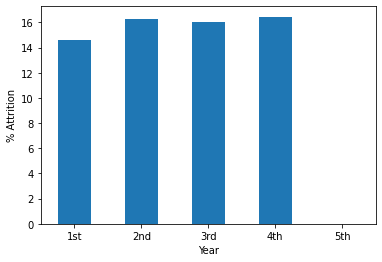

In [ ]:
X_train["months_bin"] = pd.cut(X_train['months_on_book'],bins=[12,24,36,48,60,72],labels=['1st','2nd','3rd','4th','5th'])

(X_train.groupby("months_bin")["attrition_flag"].mean()*100).plot(kind="bar")
plt.ylabel("% Attrition")
plt.xlabel("Year")
plt.xticks(rotation=0);

From the bar plot above we can conclude that there's no relationship between the tendency attrition with the customer's loyalty

##Find out if the more frequent customer interacts with the bank in 1 year, it will affect the likelihood of customer to attrit?

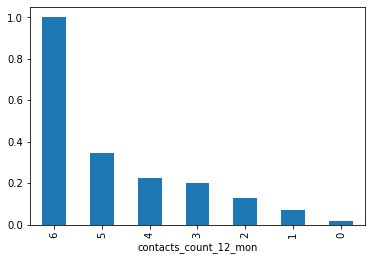

In [ ]:
X_train.groupby('contacts_count_12_mon')['attrition_flag'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar');

In [ ]:
prop_agg(X_train, "contacts_count_12_mon", "attrition_flag");

As we can see, the more frequent customer interacts with the bank the more likely they attrit.

#Pre-Processing

**Typecasting Categorical Value Into Numeric**

In [ ]:
X_train['gender'].replace(['M','F'],[0,1],inplace=True)
X_train['education_level'].replace(['Uneducated','High School','Graduate','College','Post-Graduate','Doctorate','Unknown'],[0,1,2,3,4,5,6,], inplace=True)
X_train['marital_status'].replace(['Single','Married','Divorced', 'Unknown'],[0,1,2,3], inplace=True)
X_train['income_category'].replace(['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'],[0,1,2,3,4,5], inplace=True)
X_train['card_category'].replace(['Blue','Gold','Silver','Platinum'],[0,1,2,3], inplace=True)

In [ ]:
X_test['gender'].replace(['M','F'],[0,1],inplace=True)
X_test['education_level'].replace(['Uneducated','High School','Graduate','College','Post-Graduate','Doctorate','Unknown'],[0,1,2,3,4,5,6,], inplace=True)
X_test['marital_status'].replace(['Single','Married','Divorced', 'Unknown'],[0,1,2,3], inplace=True)
X_test['income_category'].replace(['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'],[0,1,2,3,4,5], inplace=True)
X_test['card_category'].replace(['Blue','Gold','Silver','Platinum'],[0,1,2,3], inplace=True)

In [ ]:
X_train = X_train.drop(["attrition_flag"], axis=1)

In [ ]:
X_train.columns

Index(['user_id', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'customer_age_bin', 'months_bin'],
      dtype='object')

In [ ]:
drop_col1 = ["gender","customer_age","dependent_count","months_on_book","avg_open_to_buy","avg_utilization_ratio","customer_age_bin","months_bin"]
drop_col2 = ["gender","customer_age","dependent_count","months_on_book","avg_open_to_buy","avg_utilization_ratio"]

X_train = X_train.drop(drop_col1,axis=1)
X_test = X_test.drop(drop_col2,axis=1)

# Modeling

## Define Model

We will use 5 models:

- KNN as a baseline model
- Decision tree
- Random Forest
- SVM RBF
- XGBoost

Compare them all and choose the best model

In [ ]:
y_train.value_counts(normalize=True)

0    0.839279
1    0.160721
Name: attrition_flag, dtype: float64

**KNN**

In [ ]:
knn_clf = KNeighborsClassifier(
    n_neighbors = 5,
)

**DecisionTree**

In [ ]:
dc_clf = DecisionTreeClassifier(
    max_depth = 5,
    ccp_alpha = 0.001,
    class_weight = {0: 0.160721, 1:0.839279}
)

**RandomForest**

In [ ]:
rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.160721, 1:0.839279}
)

**SVM RBF**

In [ ]:
svm_clf = SVC(
    random_state = 1000,
    probability=True,
    class_weight = {0: 0.160721, 1:0.839279}
)

**XGBoost**

In [ ]:
xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.160721, 1:0.839279}
)

##Fitting the Model

**KNN**

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

**DecisionTree**

In [ ]:
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.160721, 1: 0.839279},
                       max_depth=5)

**RandomForest**

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.160721, 1: 0.839279},
                       n_estimators=1000, random_state=1000)

**SVM RBF**

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(class_weight={0: 0.160721, 1: 0.839279}, probability=True,
    random_state=1000)

**XGBoost**

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(class_weight={0: 0.160721, 1: 0.839279}, n_estimators=1000,
              random_state=1000)

##Model Evaluation

In [ ]:
X_train.shape

(8101, 14)

In [ ]:
X_test.shape

(2026, 14)

In [ ]:
# knn prediction
knn_pred = knn_clf.predict(X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)

# decision tree prediction
dc_pred = dc_clf.predict(X_test)
dc_pred_proba = dc_clf.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

**KNN Evaluation**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.839632,0.161765,0.816881,0.500698,0.730892
recall,0.966490,0.033846,0.816881,0.500168,0.816881
f1-score,0.898606,0.055980,0.816881,0.477293,0.763437
support,1701.000000,325.000000,0.816881,2026.000000,2026.000000


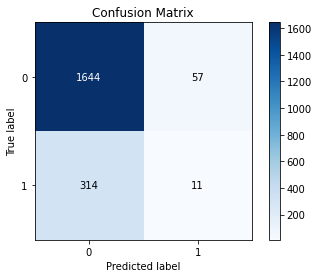

In [ ]:
# knn result
skplt.metrics.plot_confusion_matrix(y_test, knn_pred);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


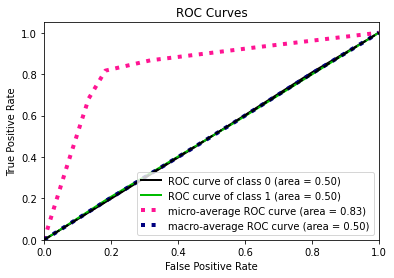

In [ ]:
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

**Decision Tree Evaluation**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.978764,0.618644,0.894867,0.798704,0.920996
recall,0.894180,0.898462,0.894867,0.896321,0.894867
f1-score,0.934562,0.732748,0.894867,0.833655,0.902188
support,1701.000000,325.000000,0.894867,2026.000000,2026.000000


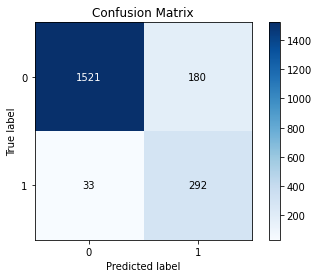

In [ ]:
# decision tree result
skplt.metrics.plot_confusion_matrix(y_test, dc_pred);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


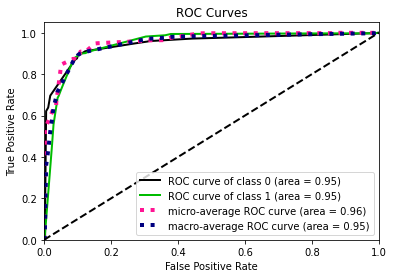

In [ ]:
skplt.metrics.plot_roc_curve(y_test, dc_pred_proba);

**Random Forest Evaluation**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.954338,0.894161,0.946199,0.924249,0.944685
recall,0.982951,0.753846,0.946199,0.868399,0.946199
f1-score,0.968433,0.818030,0.946199,0.893232,0.944306
support,1701.000000,325.000000,0.946199,2026.000000,2026.000000


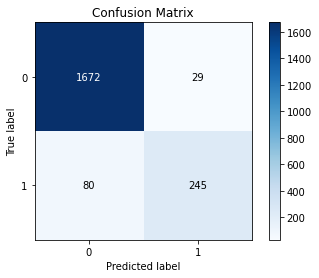

In [ ]:
# randomforest result
skplt.metrics.plot_confusion_matrix(y_test, rf_pred);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


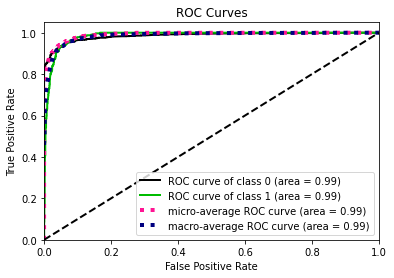

In [ ]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

**SVM RBF Evaluation**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.849587,0.164673,0.3692,0.507130,0.739717
recall,0.302175,0.720000,0.3692,0.511088,0.369200
f1-score,0.445794,0.268041,0.3692,0.356917,0.417280
support,1701.000000,325.000000,0.3692,2026.000000,2026.000000


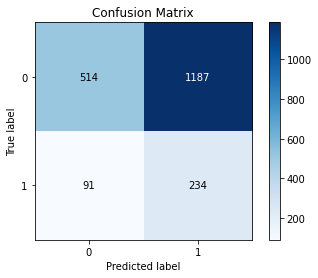

In [ ]:
# svm result
skplt.metrics.plot_confusion_matrix(y_test, svm_pred);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


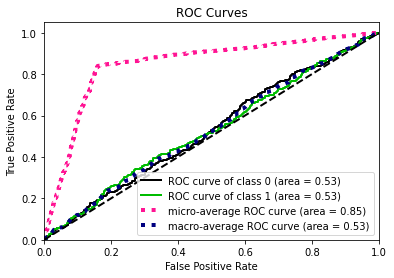

In [ ]:
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba);

**XGBoost Evaluation**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.973162,0.894231,0.961007,0.933696,0.960500
recall,0.980600,0.858462,0.961007,0.919531,0.961007
f1-score,0.976867,0.875981,0.961007,0.926424,0.960683
support,1701.000000,325.000000,0.961007,2026.000000,2026.000000


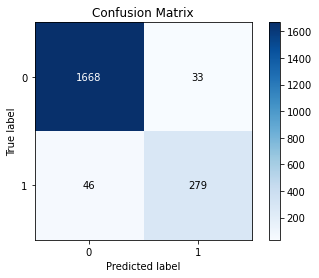

In [ ]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


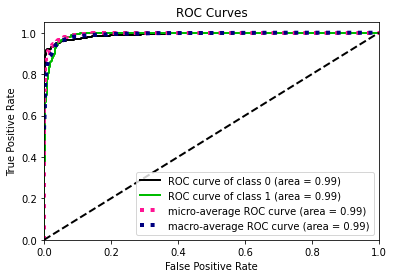

In [ ]:
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

From the Model Evaluation above, we know the best model that we can use to predict churn for this data is XGBoost. Because this data is imbalance we can focus to the f1-score first, which model XGBoost gets for churn prediction is 87.5%. While the accuracy is 96% and the ROC curve of churn prediction is 99%!!! That's awesome!!

#Explanatory Model Analysis

##Feature Importance

In [ ]:
## initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_clf, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 14 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f6d466b0440> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 5.01e-09, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.616, mean = -1.11e-05, max = 0.55
  -> model_info        : package xgboost

A new explainer has been created!


In [ ]:
# visualize permutation feature importance for Random Forest Model
churn_xgb_exp.model_parts().plot()

From the permutation feature importance above we can conclude that there are 6 features that affect to churn. The most influence features are total nominal transaction and total frequency of transaction. I think it makes sense, the least customer do transaction and the smaller number of transaction paid by customer, they will tend to churn.

##Partial Dependence Plot

In [ ]:
# create partial dependence plot of XGBoost model
churn_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]


##Interpretation


1. By giving or providing more products, specifically more than 2, it is probably decrease customer's propensity to churn for 28%.
2. The more frequent customer visit the bank, the percentage of customer's propensity to churn increases to 30% if more than 5 times.
3. If customer used their balance more than $430 in one transaction, there's a probability that customer retain around 23%.
4. If customer has total nominal transaction more than 5K, the probability of customer churn is increase for 1.5 times. It makes sense because the higher customer's total nominal transaction, it will affect their interest and ability to return the credit.
5. The customer who are freuqent to do transaction around 50-100 times a year decrease propensity to churn until 98%.
6. The more increasing on total amount and total frequency in Q1 and Q4 will decrease customer to churn a little bit.

# Cumulative Gain to give the insight to stakeholders

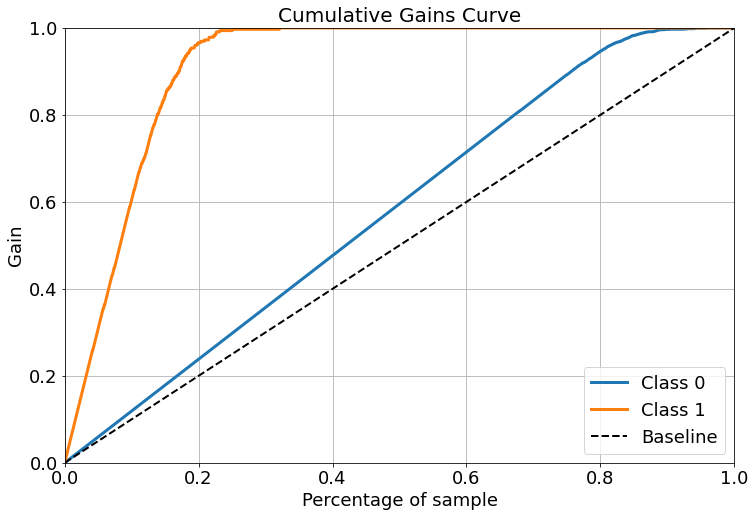

In [ ]:
#Cumulative Gain
skplt.metrics.plot_cumulative_gain(y_test, xgb_pred_proba, figsize=(12, 8), title_fontsize=20, text_fontsize=18)
plt.show()

This cumulative gain curve tells us that the model we just made has a good performance. Because if we compare our model with the random choice, the random choice only covers 20% customer which is likely to churn with 20% of population. Yet, using our model, it covers roughly 96% customers who are likely to churn with only 20% population.

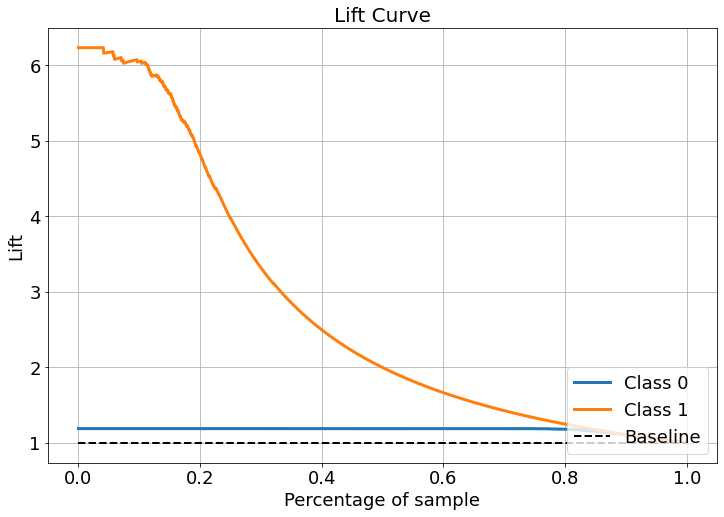

In [ ]:
skplt.metrics.plot_lift_curve(y_test, xgb_pred_proba, figsize=(12, 8), title_fontsize=20, text_fontsize=18)
plt.show()

With 20% population, the model is better almost roughly 5 times than using random choices.

Source:
https://towardsdatascience.com/evaluate-model-performance-with-cumulative-gains-and-lift-curves-1f3f8f79da01

#Recommendations

---

* Reset the current credit limit to match proper customer profile
* Offer product bundling or product bonus to customer to increase the customer retains
* Give an excellent customer service to reduce the customers interaction with the bank in a year
* Make a point system where the customer gets transaction point and able to exchange with direct prize

